** Continue with the previous exercise. Start by importing the necessary libraries and loading the Adult dataset.**

# Feature encoding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_bokeh

pandas_bokeh.output_notebook()

df = pd.read_csv('./data/adult/adult.csv')
df.head()

Loading BokehJS ...

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Check the columns data types

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Get the object columns and transform them to categorical

In [3]:
obj_cols = df.select_dtypes(include=['object']).columns
df[obj_cols] = df[obj_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              48842 non-null  int64   
 1   workclass        48842 non-null  category
 2   fnlwgt           48842 non-null  int64   
 3   education        48842 non-null  category
 4   educational-num  48842 non-null  int64   
 5   marital-status   48842 non-null  category
 6   occupation       48842 non-null  category
 7   relationship     48842 non-null  category
 8   race             48842 non-null  category
 9   gender           48842 non-null  category
 10  capital-gain     48842 non-null  int64   
 11  capital-loss     48842 non-null  int64   
 12  hours-per-week   48842 non-null  int64   
 13  native-country   48842 non-null  category
 14  income           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


## Get the categorical columns into a `cat_cols` variable

In [4]:
cat_cols = df.select_dtypes(include=['category']).columns
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

## Build a new dataframe where all categorical column are replaced by their one-hot encoding

In [5]:
df_one_hot_encoded = df.copy()
for col in cat_cols:
    df_single_col_one_hot_encoded = pd.get_dummies(df[col], prefix=col)
    df_one_hot_encoded = pd.concat([df_one_hot_encoded, df_single_col_one_hot_encoded], axis=1)
    df_one_hot_encoded.drop(col, axis=1, inplace=True)
df_one_hot_encoded.head(10)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25,226802,7,0,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,38,89814,9,0,0,50,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,28,336951,12,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
3,44,160323,10,7688,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,18,103497,10,0,0,30,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
5,34,198693,6,0,0,30,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
6,29,227026,9,0,0,40,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
7,63,104626,15,3103,0,32,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
8,24,369667,10,0,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
9,55,104996,4,0,0,10,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


## Build a new dataframe where all categorical columns are replaced by their label encoding

Use the `astype('category').cat.codes` method to encode the categorical columns. This method will assign a number to each category in the column. For example, the column `workclass` has 9 categories. The first category will be assigned the number 0, the second category will be assigned the number 1, and so on. The `astype('category')` method will convert the column to a categorical column. The `cat.codes` method will assign a number to each category.

In [6]:
df_label_encoded = df.copy()
for col in cat_cols:
    df_label_encoded[col] = df_label_encoded[col].cat.codes

df_label_encoded.head(10)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0
5,34,4,198693,0,6,4,8,1,4,1,0,0,30,39,0
6,29,0,227026,11,9,4,0,4,2,1,0,0,40,39,0
7,63,6,104626,14,15,2,10,0,4,1,3103,0,32,39,1
8,24,4,369667,15,10,4,8,4,4,0,0,0,40,39,0
9,55,4,104996,5,4,2,3,0,4,1,0,0,10,39,0


In [7]:
df['workclass'].astype('category').cat.codes

0        4
1        4
2        2
3        4
4        0
        ..
48837    4
48838    4
48839    4
48840    4
48841    5
Length: 48842, dtype: int8

In [8]:
import sklearn.preprocessing as preprocessing

# copy the dataframe
df_label_encoded = df.copy()

# create a label encoder
le = preprocessing.LabelEncoder()
le.fit(df['workclass'])
le.transform(df['workclass'])



array([4, 4, 2, ..., 4, 4, 5])

## Build a new dataframe where the `education` column is replaced by its ordinal encoding and the `education-num` column is dropped

In [9]:
df_ordinal_encoded = df.copy()

# create a dictionary with the mapping
education_mapping = {
    'Preschool': 0,
    '1st-4th': 1,
    '5th-6th': 2,
    '7th-8th': 3,
    '9th': 4,
    '10th': 5,
    '11th': 6,
    '12th': 7,
    'HS-grad': 8,
    'Some-college': 9,
    'Assoc-voc': 10,
    'Assoc-acdm': 11,
    'Bachelors': 12,
    'Masters': 13,
    'Prof-school': 14,
    'Doctorate': 15
}

# replace the values in the column
df_ordinal_encoded['education'] = df_ordinal_encoded['education'].map(education_mapping)

# drop the education-num column
df_ordinal_encoded.drop('educational-num', axis=1, inplace=True)

df_ordinal_encoded.head(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,6,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,8,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,11,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,9,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,9,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,5,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,8,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,9,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,3,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


# Feature scaling

## Standardize the hours-per-week column (suggestion: use the `StandardScaler` class from `sklearn.preprocessing`). Plot pre and post-scaling histograms. What is the tranformed value of a person working 40 hours per week?

/Users/pcardoso/miniconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The transformed value of a person working 40 hours per week is -0.03408696347500956


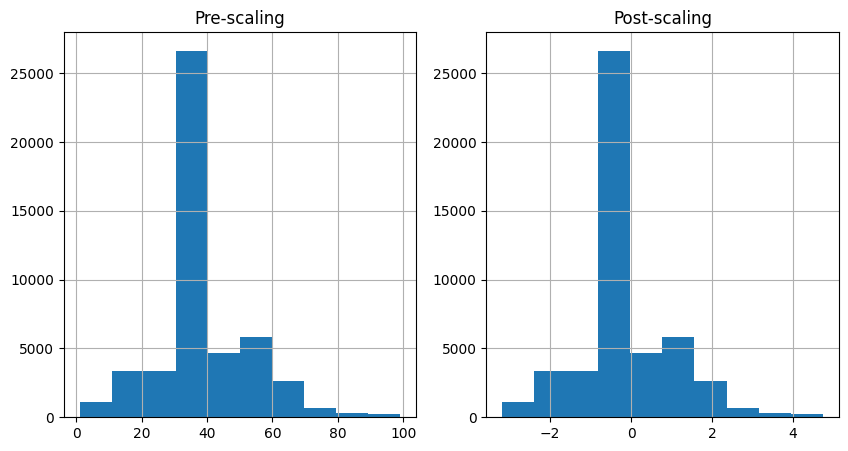

In [10]:
from sklearn.preprocessing import StandardScaler

# copy the dataframe
df_scaled = df.copy()

# create a scaler
scaler = StandardScaler()

# fit the scaler to the hours-per-week column
scaler.fit(df_scaled[['hours-per-week']])
df_scaled['hours-per-week_scaled'] = scaler.transform(df_scaled[['hours-per-week']])

# plot the pre and post-scaling histograms in two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

df['hours-per-week'].hist(ax=ax[0])
ax[0].set_title('Pre-scaling')

df_scaled['hours-per-week_scaled'].hist(ax=ax[1])
ax[1].set_title('Post-scaling')

# the transformed value of a person working 40 hours per week
print(f'The transformed value of a person working 40 hours per week is {scaler.transform([[40]])[0][0]}')

## Use the `MinMaxScaler` class from `sklearn.preprocessing` to scale the `hours-per-week` column. Plot pre and post-scaling histograms. What is the tranformed value of a person working 40 hours per week?

The transformed value of a person working 40 hours per week is 0.39795918367346933


/Users/pcardoso/miniconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


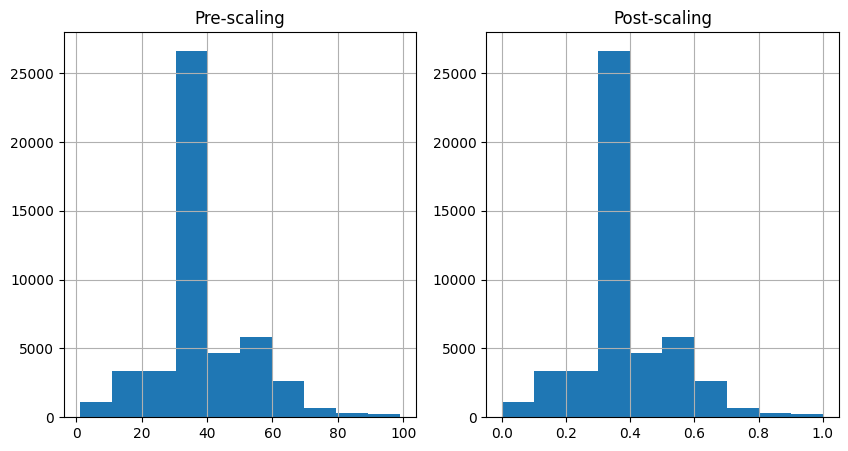

In [11]:
from sklearn.preprocessing import MinMaxScaler

# copy the dataframe
df_scaled = df.copy()

# create a scaler
scaler = MinMaxScaler()

# fit the scaler to the age column
scaler.fit(df_scaled[['hours-per-week']])
df_scaled['hours-per-week_scaled'] = scaler.transform(df_scaled[['hours-per-week']])

# plot the pre and post-scaling histograms in two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

df['hours-per-week'].hist(ax=ax[0])
ax[0].set_title('Pre-scaling')

df_scaled['hours-per-week_scaled'].hist(ax=ax[1])
ax[1].set_title('Post-scaling')

# the transformed value of a person working 40 hours per week
print(f'The transformed value of a person working 40 hours per week is {scaler.transform([[40]])[0][0]}')

## Use the `RobustScaler` class from `sklearn.preprocessing` to scale the `hours-per-week` column. Plot pre and post-scaling histograms. What is the tranformed value of a person working 40 hours per week?

/Users/pcardoso/miniconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


The transformed value of a person working 40 hours per week is 0.0


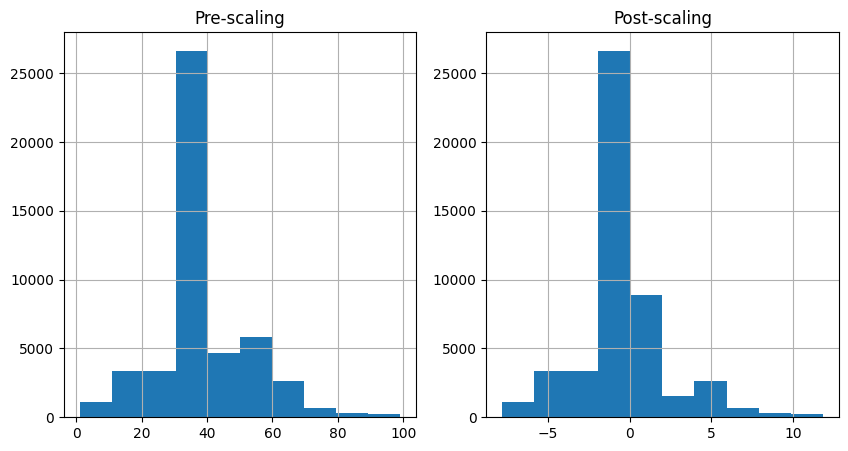

In [12]:
from sklearn.preprocessing import RobustScaler

# copy the dataframe
df_scaled = df.copy()

# create a scaler
scaler = RobustScaler()

# fit and transform the scaler to the age column
df_scaled['hours-per-week_scaled'] = scaler.fit_transform(df_scaled[['hours-per-week']])

# plot the pre and post-scaling histograms in two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

df['hours-per-week'].hist(ax=ax[0])
ax[0].set_title('Pre-scaling')

df_scaled['hours-per-week_scaled'].hist(ax=ax[1])
ax[1].set_title('Post-scaling')

# the transformed value of a person working 40 hours per week
print(f'The transformed value of a person working 40 hours per week is {scaler.transform([[40]])[0][0]}')

# Feature transformation

## Find if  `hours-per-week` has outliers using the `IQR` method. If yes, transform the column using the `log` function. Plot the pre and post-transformation histograms. What is the tranformed value of a person working 40 hours per week?

Thre Are outliers
The transformed value of a person working 40 hours per week is 3.69


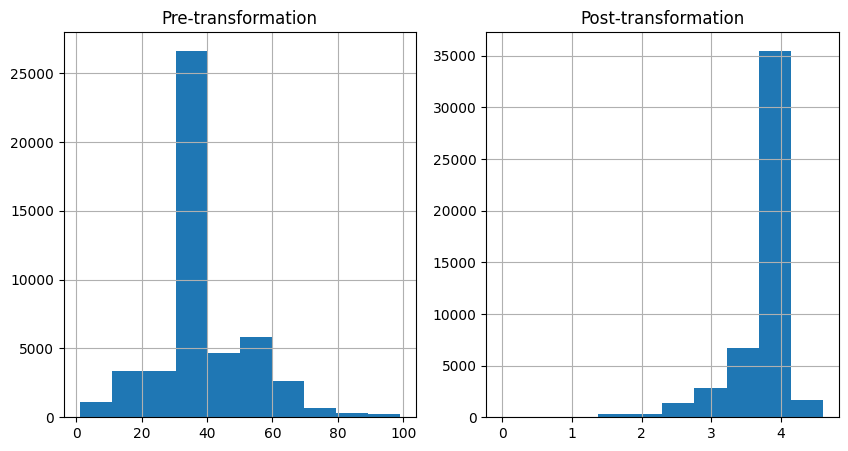

In [13]:
df_transformed = df.copy()

# calculate the IQR
Q1 = df_transformed['hours-per-week'].quantile(0.25)
Q3 = df_transformed['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1

has_outlier = not df_transformed[(df_transformed["hours-per-week"] < (Q1 - 1.5 * IQR)) | (df_transformed["hours-per-week"] > (Q3 + 1.5 * IQR))].empty
# check if there are outliers

if has_outlier:
    print(f'Thre Are outliers')

    # transform the column
    df_transformed['hours-per-week_log'] = np.log(df_transformed['hours-per-week'])

    # plot the pre and post-transformation histograms in two subplots
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    df['hours-per-week'].hist(ax=ax[0])
    ax[0].set_title('Pre-transformation')

    df_transformed['hours-per-week_log'].hist(ax=ax[1])
    ax[1].set_title('Post-transformation')

    # the transformed value of a person working 40 hours per week
    print('The transformed value of a person working 40 hours per week is {:.2f}'.format(np.log(40)))

## Transform the hours-per-week column using the `sqrt` function. Plot the pre and post-transformation histograms. What is the tranformed value of a person working 40 hours per week?

The transformed value of a person working 40 hours per week is 6.32


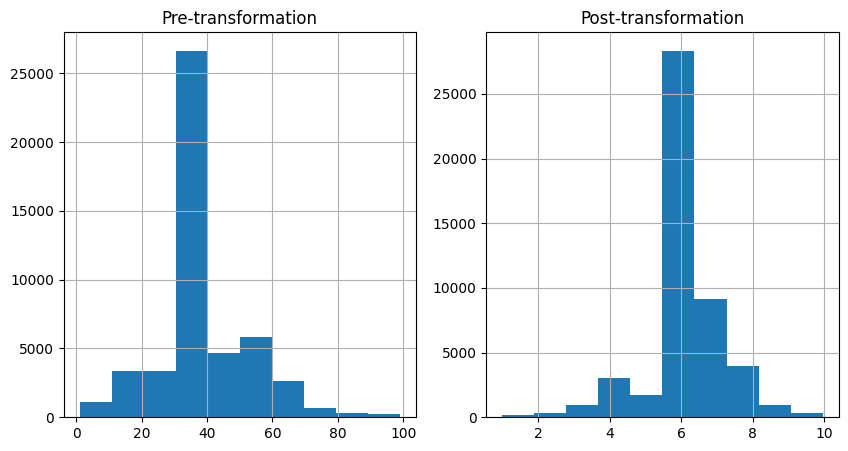

In [14]:
df_transformed = df.copy()

# transform the column
df_transformed['hours-per-week_sqrt'] = np.sqrt(df_transformed['hours-per-week'])

# plot the pre and post-transformation histograms in two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

df['hours-per-week'].hist(ax=ax[0])
ax[0].set_title('Pre-transformation')

df_transformed['hours-per-week_sqrt'].hist(ax=ax[1])
ax[1].set_title('Post-transformation')

# the transformed value of a person working 40 hours per week
print('The transformed value of a person working 40 hours per week is {:.2f}'.format(np.sqrt(40)))

## Transform the hours-per-week column using a descritization method of your choice. Plot the pre and post-transformation histograms.

In [15]:
df_transformed = df.copy()

# transform the column
df_transformed['hours-per-week_disc'] = pd.cut(df_transformed['hours-per-week'], bins=10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

df_transformed

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,hours-per-week_disc
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,4
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,5
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,4
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,4
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,4
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,4
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,4
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,2


In [16]:
df_transformed[['hours-per-week']].value_counts()

hours-per-week
40                22803
50                 4246
45                 2717
60                 2177
35                 1937
                  ...  
87                    1
82                    1
94                    1
79                    1
69                    1
Name: count, Length: 96, dtype: int64

In [17]:
df_transformed[['hours-per-week_disc']].value_counts()

hours-per-week_disc
4                      26639
5                       8917
3                       3398
2                       3328
7                       2642
6                       1582
1                       1125
8                        683
9                        315
10                       213
Name: count, dtype: int64

Text(0.5, 1.0, 'Post-transformation')

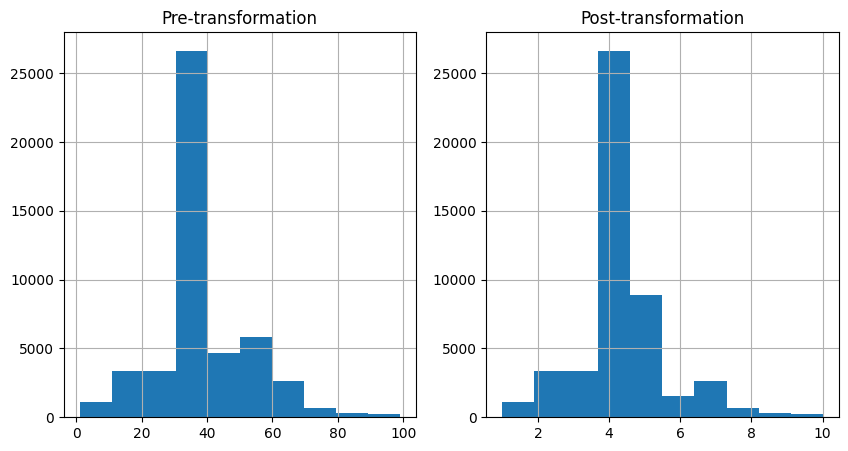

In [18]:
# plot the pre and post-transformation histograms in two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

df['hours-per-week'].hist(ax=ax[0])
ax[0].set_title('Pre-transformation')

df_transformed['hours-per-week_disc'].hist(ax=ax[1])
ax[1].set_title('Post-transformation')

# Split  complex columns

Consider the following column:

In [19]:
df2 = df.copy()

In [20]:
df2.replace('?', 'unknown', inplace=True)

df_strings = 'A '\
                    + df2['race'].astype(str).str.lower() + ' ' + df2['gender'].astype(str).str.lower() \
                    + ' with ' + df2['age'].astype(str) + ' years old' \
                    + ' doing ' + df2['occupation'].astype(str).str.lower() \
                    + ' in ' + df2['workclass'].astype(str).str.lower() \
                    + ' for ' \
                    + df2['hours-per-week'].astype(str).str.lower() \
                    + ' hours per week'

df_strings.head()

0    A black male with 25 years old doing machine-o...
1    A white male with 38 years old doing farming-f...
2    A white male with 28 years old doing protectiv...
3    A black male with 44 years old doing machine-o...
4    A white female with 18 years old doing unknown...
dtype: object

In [21]:
# use regular expression to extract
# race, gender, age, activity and working hours columns from a string
# Example: 'A white male with 38 years old doing farming-fishing in private for 50 hours per week' -> (white, male, 38, farming-fishing, 50)
import re

# do the extraction and create a new dataframe
extraction_rule = r'A (\w+) (\w+) with (\d+) years old doing ([a-zA-Z\-]+) in ([a-zA-Z\-]+) for (\d+) hours per week'

df_extracted = df_strings\
    .map(lambda x: re.findall(extraction_rule, x))\
    .apply(pd.Series)[0]\
    .apply(pd.Series)

df_extracted.columns = ['race', 'gender', 'age', 'ocuppation', 'workclass', 'hours-per-week']

df_extracted

,race,gender,age,ocuppation,workclass,hours-per-week
0,black,male,25,machine-op-inspct,private,40
1,white,male,38,farming-fishing,private,50
2,white,male,28,protective-serv,local-gov,40
3,black,male,44,machine-op-inspct,private,40
4,white,female,18,unknown,unknown,30
...,...,...,...,...,...,...
48837,white,female,27,tech-support,private,38
48838,white,male,40,machine-op-inspct,private,40
48839,white,female,58,adm-clerical,private,40
48840,white,male,22,adm-clerical,private,20


# Feature selection

## Build a dataframe resulting from applying label encoding to all categorical columns

In [22]:
from sklearn.preprocessing import LabelEncoder

# copy the dataframe
df_encoded = df.copy()

#category columns
cat_cols = df_encoded.select_dtypes(include=['category']).columns

# encode the categorical columns
for col in cat_cols:
    print(f'Encoding {col}')
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

df_encoded

Encoding workclass
Encoding education
Encoding marital-status
Encoding occupation
Encoding relationship
Encoding race
Encoding gender
Encoding native-country
Encoding income


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
48838,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
48839,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
48840,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


## Using correlation, which features give more information about the income of a person?

income             1.000000
educational-num    0.332613
relationship       0.253214
age                0.230369
hours-per-week     0.227687
capital-gain       0.223013
gender             0.214628
marital-status     0.199072
capital-loss       0.147554
education          0.080091
occupation         0.076722
race               0.070934
workclass          0.052674
native-country     0.012210
fnlwgt             0.006339
Name: income, dtype: float64

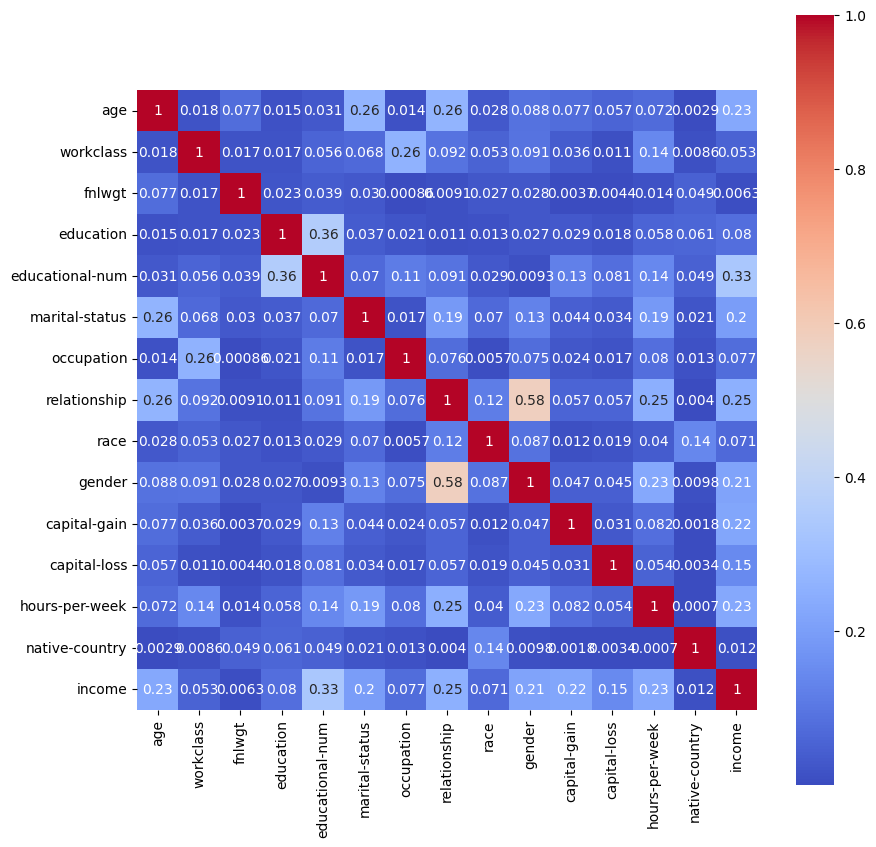

In [23]:
# calculate the correlation matrix
corr = df_encoded.corr().abs()

# plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, square=True, cmap='coolwarm')

corr['income'].sort_values(ascending=False)

In [24]:
df_encoded.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


# Using a SVC classifier, build a model to predict the income of a person.
- Try different encoding methods for the categorical columns.
- Try limiting the number of features using the correlation matrix.

What is the accuracy of the model in each case?

### Label encoding case
#### Encode the categorical columns using label encoding

In [25]:
# import the LabelEncoder
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

#category columns
cat_cols = df_encoded.select_dtypes(include=['category']).columns

# encode the categorical columns
for col in cat_cols:
    print(f'Encoding {col}')
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

df_encoded.head()

Encoding workclass
Encoding education
Encoding marital-status
Encoding occupation
Encoding relationship
Encoding race
Encoding gender
Encoding native-country
Encoding income


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


#### Define a method to select the best features using the correlation matrix

In [26]:
def select_features(df, threshold=0.0):
    # calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # select the upper triangle of the correlation matrix
    upper = corr_matrix['income'].sort_values(ascending=False)

    # find the features with correlation greater than the threshold
    mask = upper >= threshold

    return corr_matrix['income'][mask].index.tolist()

#### Define a method to train a SVC classifier and print the classification report given a dataframe and a list of features

In [27]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

def train_and_report(df, features):
    # split the dataframe into train and test
    X_train, X_test, y_train, y_test = train_test_split(df[features].drop('income', axis=1), df['income'], test_size=0.2, random_state=42)

    # create the model
    model = SVC()

    # train the model
    model.fit(X_train, y_train)

    # predict the test set
    y_pred = model.predict(X_test)

    # print the classification report
    print(classification_report(y_test, y_pred))

#### Run the model with different thresholds for the feature selection

In [28]:
for threshold in [0.0, 0.1, 0.2, 0.3, 0.4]:
    print(f'Features with correlation greater than {threshold}')
    feature = select_features(df_encoded, threshold=threshold)
    print(f'Features: {feature}')

    if len(feature) > 1:
        print('Classification report')
        train_and_report(df_encoded, feature)
    else:
        print('Not enough features to train the model')

Features with correlation greater than 0.0
Features: ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
Classification report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      7479
           1       0.96      0.17      0.29      2290

    accuracy                           0.80      9769
   macro avg       0.88      0.58      0.59      9769
weighted avg       0.83      0.80      0.75      9769

Features with correlation greater than 0.1
Features: ['age', 'educational-num', 'marital-status', 'relationship', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']
Classification report
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7479
           1       0.74      0.27      0.40      2290

    accuracy         

### One-hot encoding case
#### Encode the categorical columns using one-hot encoding

In [29]:
#copy the dataframe
df_onehot = df.drop('income', axis=1).copy()

# get categorical columns
cat_cols = df_onehot.select_dtypes(include=['category']).columns

# encode the categorical columns
df_onehot = pd.get_dummies(df_onehot, columns=cat_cols)
df_onehot['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

df_onehot.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,25,226802,7,0,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
1,38,89814,9,0,0,50,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
2,28,336951,12,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,1
3,44,160323,10,7688,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
4,18,103497,10,0,0,30,True,False,False,False,...,False,False,False,False,False,False,True,False,False,0


In [30]:
# run the model with different thresholds for the feature selection
for threshold in [0.0, 0.1, 0.2, 0.3, 0.4]:
    print(f'Features with correlation greater than {threshold}')
    feature = select_features(df_onehot, threshold=threshold)
    print(f'Features: {feature}')

    if len(feature) > 1:
        print('Classification report')
        train_and_report(df_onehot, feature)
    else:
        print('Not enough features to train the model')

Features with correlation greater than 0.0
Features: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_?', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupa

/Users/pcardoso/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pcardoso/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pcardoso/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
